In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
from sklearn.datasets import make_moons, make_regression

## Задача регрессии: апроксимировать функцию

## $f = \sin(2\pi*x)$

In [3]:
f = lambda x: np.sin(x * 2 * np.pi)

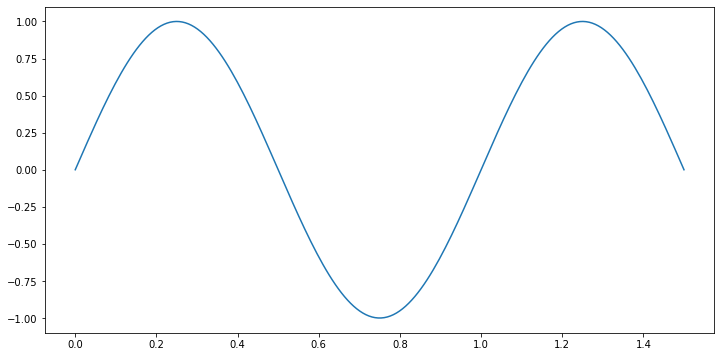

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, 1.5, 200), [f(x) for x in np.linspace(0, 1.5, 200)])
plt.show()

In [5]:
np.random.seed(1568)
d_x = np.linspace(0, 1.5, 30)
X, y = d_x, [f(x) + np.random.normal(scale=0.2) for x in d_x]

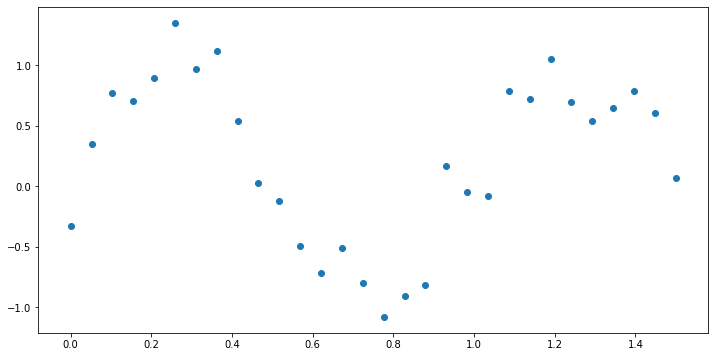

In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1568)

In [9]:
lr = LinearRegression()

In [10]:
X_train, X_test, X = pd.DataFrame(X_train, columns=['x']), pd.DataFrame(X_test, columns=['x']), \
pd.DataFrame(X, columns=['x'])

In [11]:
X_train.shape, X_test.shape

((21, 1), (9, 1))

In [12]:
X_train.head()

,x
0,0.103448
1,0.620690
2,0.672414
3,0.517241
4,0.827586


In [13]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(f'Коэффициенты линейной модели = {lr.coef_}, Смещение линейной модели = {lr.intercept_}')

Коэффициенты линейной модели = [0.04869242], Смещение линейной модели = 0.21347659568041083


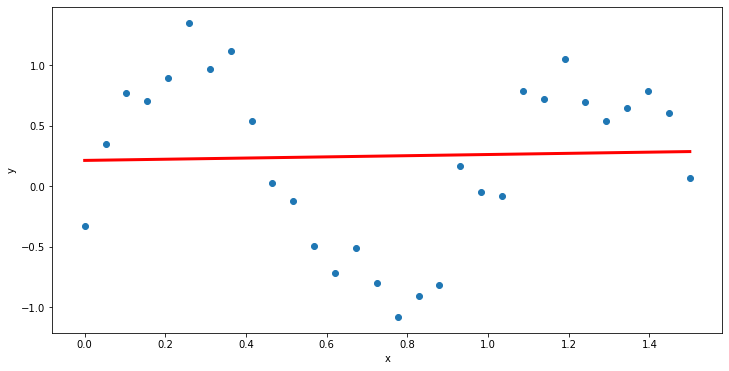

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.plot(X, lr.predict(X), '-r', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
def print_model_metrics(y_true, y_pred):
    print(f"MSE: {round(mean_squared_error(y_true, y_pred), 3):6}")
    print(f"RMSE: {round(np.sqrt(mean_squared_error(y_true, y_pred)), 3)}")
    print(f"MAE: {round(mean_absolute_error(y_true, y_pred), 3):6}")
    print(f"R2: {round(r2_score(y_true, y_pred), 3):7}")

In [18]:
print_model_metrics(y_test, lr.predict(X_test))

MSE:  0.343
RMSE: 0.585
MAE:  0.523
R2:  -0.029


In [19]:
print_model_metrics(y_train, lr.predict(X_train))

MSE:  0.503
RMSE: 0.709
MAE:  0.616
R2:   0.001


Добавим квадратичную зависимость

In [20]:
X_train['x^2'] = X_train.x ** 2
X_test['x^2'] = X_test.x ** 2
X['x^2'] = X.x ** 2

In [21]:
X_train.head()

,x,x^2
0,0.103448,0.010702
1,0.620690,0.385256
2,0.672414,0.452140
3,0.517241,0.267539
4,0.827586,0.684899


In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(f'Коэффициенты линейной модели = {lr.coef_}, Смещение линейной модели = {lr.intercept_}')

Коэффициенты линейной модели = [-4.81295981  2.89453974], Смещение линейной модели = 1.7457785151163934


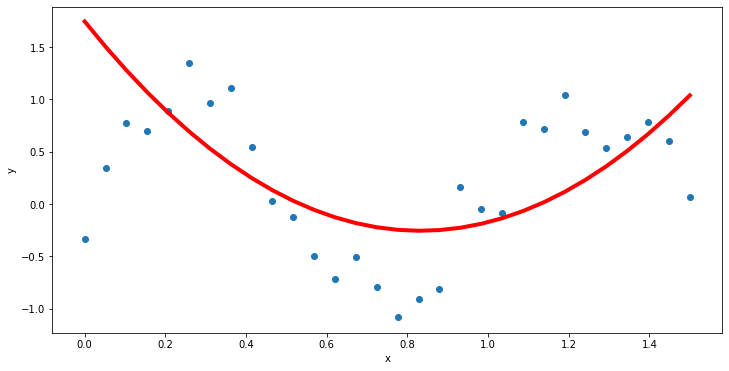

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(X.x, y)
plt.plot(X.x, lr.predict(X), '-r', linewidth=4)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
print_model_metrics(y_test, lr.predict(X_test))

MSE:  0.766
RMSE: 0.875
MAE:   0.64
R2:    -1.3


In [26]:
print_model_metrics(y_train, lr.predict(X_train))

MSE:  0.304
RMSE: 0.551
MAE:  0.471
R2:   0.397


3-я и 4-я степени

In [27]:
X_train['x^3'] = X_train.x ** 3
X_test['x^3'] = X_test.x ** 3
X['x^3'] = X.x ** 3

X_train['x^4'] = X_train.x ** 4
X_test['x^4'] = X_test.x ** 4
X['x^4'] = X.x ** 4

In [28]:
X.head()

,x,x^2,x^3,x^4
0,0.000000,0.000000,0.000000,0.000000
1,0.051724,0.002675,0.000138,0.000007
2,0.103448,0.010702,0.001107,0.000115
3,0.155172,0.024078,0.003736,0.000580
4,0.206897,0.042806,0.008856,0.001832


In [29]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(f'Коэффициенты линейной модели = {lr.coef_}, Смещение линейной модели = {lr.intercept_}')

Коэффициенты линейной модели = [ 15.59826958 -54.85564838  58.45826562 -19.2055917 ], Смещение линейной модели = -0.151029294243348


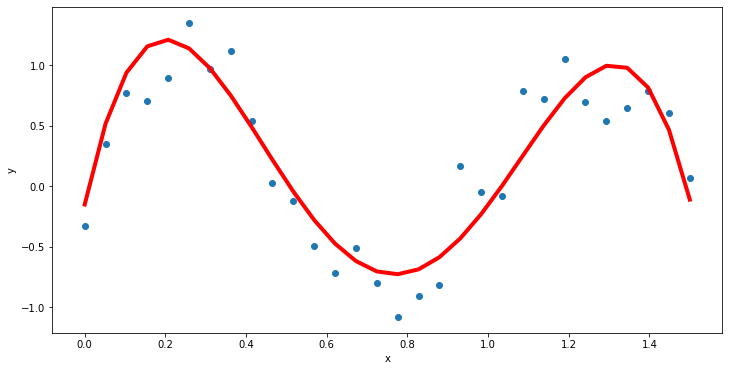

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(X.x, y)
plt.plot(X.x, lr.predict(X), '-r', linewidth=4)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
print_model_metrics(y_test, lr.predict(X_test))

MSE:  0.061
RMSE: 0.247
MAE:  0.224
R2:   0.817


In [33]:
print_model_metrics(y_train, lr.predict(X_train))

MSE:  0.079
RMSE: 0.282
MAE:  0.234
R2:   0.842


In [34]:
for i in range(5, 16):
    X_train[f'x^{i}'] = X_train.x ** i
    X_test[f'x^{i}'] = X_test.x ** i
    X[f'x^{i}'] = X.x ** i

In [35]:
X.head()

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.051724,0.002675,0.000138,0.000007,3.702255e-07,1.914959e-08,9.904962e-10,5.123256e-11,2.649960e-12,1.370669e-13,7.089668e-15,3.667069e-16,1.896760e-17,9.810828e-19,5.074566e-20
2,0.103448,0.010702,0.001107,0.000115,1.184722e-05,1.225574e-06,1.267835e-07,1.311554e-08,1.356780e-09,1.403565e-10,1.451964e-11,1.502032e-12,1.553826e-13,1.607406e-14,1.662834e-15
3,0.155172,0.024078,0.003736,0.000580,8.996479e-05,1.396005e-05,2.166215e-06,3.361369e-07,5.215917e-08,8.093664e-09,1.255913e-09,1.948831e-10,3.024048e-11,4.692489e-12,7.281448e-13
4,0.206897,0.042806,0.008856,0.001832,3.791109e-04,7.843674e-05,1.622829e-05,3.357577e-06,6.946712e-07,1.437251e-07,2.973622e-08,6.152322e-09,1.272894e-09,2.633574e-10,5.448774e-11


In [36]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(f'Коэффициенты линейной модели = {lr.coef_}, Смещение линейной модели = {lr.intercept_}')

Коэффициенты линейной модели = [-1.15165316e+05  1.60203110e+06 -1.28927155e+07  6.77569062e+07
 -2.47922312e+08  6.55730690e+08 -1.28188050e+09  1.87408057e+09
 -2.05547335e+09  1.68219730e+09 -1.01136896e+09  4.33385746e+08
 -1.25217542e+08  2.18533604e+07 -1.73961877e+06], Смещение линейной модели = 3557.5033413863157


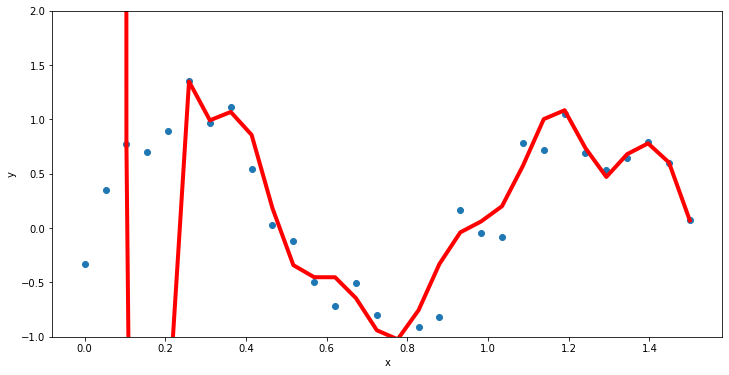

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(X.x, y)
plt.plot(X.x, lr.predict(X), '-r', linewidth=4)
plt.ylim([-1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
print_model_metrics(y_test, lr.predict(X_test))

MSE: 1435045.919
RMSE: 1197.934
MAE: 454.138
R2: -4309333.996


In [40]:
print_model_metrics(y_train, lr.predict(X_train))

MSE:  0.018
RMSE: 0.136
MAE:    0.1
R2:   0.963


## Бинарная классификация

In [70]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=1568)

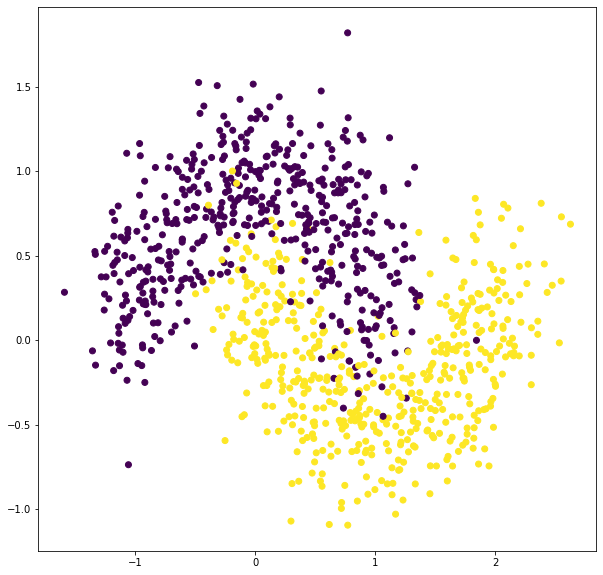

In [71]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [72]:
X = pd.DataFrame(X, columns=['x1', 'x2'])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1568)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [76]:
log_reg = LogisticRegression() # penalty='l2', C=1

In [77]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
def print_model_metrics(y_true, y_pred, y_prob):
    print(f"Accuracy: {round(accuracy_score(y_true, y_pred), 3):6}")
    print(f"Precision: {round(precision_score(y_true, y_pred), 3)}")
    print(f"Recall: {round(recall_score(y_true, y_pred), 3):8}")
    print(f"F1: {round(f1_score(y_true, y_pred), 3):12}")
    print(f"AUC-ROC: {round(roc_auc_score(y_true, y_prob), 3):7}")

In [89]:
print_model_metrics(y_test, log_reg.predict(X_test), log_reg.predict_proba(X_test)[:, 1])

Accuracy:  0.843
Precision: 0.889
Recall:    0.805
F1:        0.845
AUC-ROC:   0.934


In [90]:
from mlxtend.plotting import plot_decision_regions

In [92]:
#pip install mlxtend

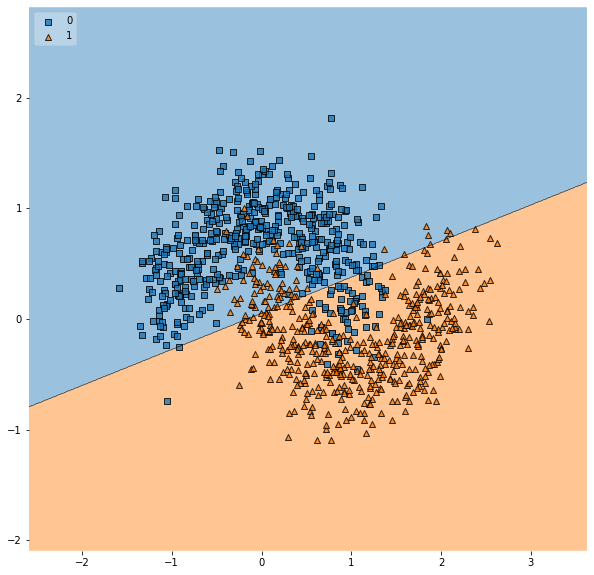

In [91]:
plt.figure(figsize=(10, 10))
plot_decision_regions(X=X.values, y=y, clf=log_reg, legend=2)
plt.show()

Нужно лучше!